# Partie 2: MA, AR, ARMA


-  Fonction d'autocorrélation(ACF) et fonction d'autocorrélation partielle(PACF)
-  Modèles autorégressifs(AR) 
-  modèles moyenne mobile(MA)
-  modèle ARMA
-  modèle ARIMA
-  Modèle SARIMA
-  Exemple de prédiction des données




<div style="text-align: center;">
    <span style="color: #2ecc71; font-weight: bold; font-size: 18px;">
        "Comprendre la théorie derrière un modèle est la moitié de la tâche à accomplir"
    </span>
</div>

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose as sm

## <font color='#922B21'> I - Fonction d'autocorrélation(ACF) et Fonction d'autocorrélation partielle(PACF) </font>

## <font color='  #d98880'>1)Fonction d'autocorrélation (ACF)(AR)

Corrélation entre une série temporelle et une version retardée d'elle-même. Il s'agit de la corrélation entre l'observation au moment actuel et les observations aux moments précédents. La fonction d'autocorrélation commence avec un décalage de 0, qui est la corrélation de la série temporelle avec elle-même et donne donc une corrélation de 1.

Le graphique de la fonction d'autocorrélation (ACF) indique une **tendance** lorsque les autocorrélations pour de petits retards sont positives et importantes, puis diminuent lentement. En revanche, **une saisonnalité** est indiquée par des autocorrélations plus élevées pour les retards saisonniers.


Nous utiliserons la fonction `plot_acf` de la bibliothèque `statsmodels.graphics.tsaplots`
Le graphique d'autocorrélation peut répondre aux questions suivantes :

- La série temporelle observée est-elle **un bruit blanc / aléatoire ?**
- Une observation est-elle liée à une observation adjacente, une observation décalée de deux, et ainsi de suite ?
- La série temporelle observée peut-elle être modélisée avec **un modèle MA (moyenne mobile) ? Si oui, quel est l'ordre ?**







## <font color='  #d98880'>2)Fonction d'autocorrélation partielle (PACF)

La corrélation partielle au décalage k est la corrélation entre $X_t$ et $X_{t−k}$ qui n'est pas expliquée par les décalages de 1 à k−1.

Nous utiliserons la fonction `plot_pacf` de la bibliothèque `statsmodels.graphics.tsaplots` avec le paramètre `method="ols"` (régression de la série temporelle sur ses décalages et sur la constante). (Voir `statsmodels.tsa.stattools.pacf`)

Note : Le paramètre par défaut pour la méthode est `yw` (Yule-Walker avec ajustement de la taille d'échantillon dans le dénominateur pour acovf). Cependant, cette valeur par défaut provoque des autocorrélations implausibles supérieures à 1 sur les données d'échantillon. Par conséquent, nous modifions le paramètre de méthode pour éviter ce problème. `ywmle` fonctionnerait également bien, comme suggéré dans cette publication sur StackExchange.

Le graphique de corrélation partielle peut répondre à la question suivante :

- La série temporelle observée peut-elle être modélisée avec un modèle AR (autorégressif) ? Si oui, quel est l'ordre ?







## <font color='#922B21'> II - Modèles Autoregressifs (AR) et Modèles Moyenne Mobile (MA)</font>

## <font color='#d98880'>1)Modèles autorégressifs(AR) 
 
<span style="color: #3498db; font-weight: bold;font-size: 18px;">-Présentation :</span> 

La représentation mathématique du modèle AR d'ordre p, noté $ AR(p)$ est  $   X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \ldots + \phi_p X_{t-p} + \epsilon_t $ 
où:
- $X_t$ est la valeur de la série temporelle à l'instant t
- $c$ est une constante
- $ϕ_1,ϕ_2,…,ϕ_p$ sont les coefficients du modèle
- $X_t−1,X_t−2,…,X_t−p$ sont les valeurs passées de la série temporelle
- $\epsilon_t $ est une composante d'erreur qui capture le bruit ou l'erreur aléatoire.

Le modèle AR suppose que la valeur actuelle d’une série temporelle est une **combinaison linéaire de ses valeurs passées**, augmenté d’une composante d’erreur.La performance du modèle dépend de la capacité de ces coefficients à capturer les tendances et les motifs de la série temporelle.

<span style="color: #3498db; font-weight: bold;font-size: 18px;">-Comment déterminer l'ordre du modèle AR? :</span> 

Pour déterminer le nombre de retards / ordre p, nous pouvons utiliser **la Fonction d'Autocorrélation (ACF) et la Fonction d'Autocorrélation Partielle (PACF)**. Nous pouvons définir l'ordre p si :

- La fonction d'autocorrélation (ACF) décroît de manière exponentielle ou a une forme sinusoïdale,

  **et**
  
- La fonction d'autocorrélation partielle (PACF) présente un pic significatif au retard p, mais aucun pic après.

**Si les graphiques ACF et PACF ne sont pas utiles**, nous pouvons tester différents ordres p, puis choisir un modèle en fonction d'un critère tel que le **Critère d'Information d'Akaike (AIC)**. Bien que **l'AIC ne trouve pas le meilleur modèle, il nous aide à identifier des modèles** qui peuvent donner de bons résultats avec le moins de paramètres possible. Ainsi, nous testons essentiellement différents ordres, puis choisissons le modèle avec le plus **faible AIC**. Cependant, il faut noter  qu'un **faible AIC ne signifie pas nécessairement que le modèle fournit de bons résultats de prévision.**

<span style="color: #3498db; font-weight: bold;font-size: 18px;">-Limites du modèle :</span> 


L'autorégression devrait être utilisée pour les séries temporelles **sans tendance et/ou saisonnalité, en contrôlant l'ordre de l'autorégression**. **Un ordre élevé** (c'est-à-dire, le nombre de retards) indique que nous devrions utiliser des paramètres supplémentaires, par exemple, en ajoutant une moyenne mobile (MA).

Il est également important de noter que nous ne pouvons prédire une cible que jusqu'à l'horizon que nous choisissons. Par exemple, si nous choisissons un ordre p de 1, nous ne pouvons prédire que le prochain pas de temps. Si nous utilisons un ordre p de 4, nous pourrions prédire quatre pas de temps dans le futur.



<span style="color: #3498db; font-weight: bold;font-size: 18px;">-Implémentation en Python :</span> 

Nous pouvons mettre en œuvre une autorégression en Python en utilisant la **classe AutoReg du package statsmodels** de Python.Cette classe nous permet de prévoir des séries temporelles **avec une tendance et/ou une saisonnalité.** Pour ce faire, nous devons passer la période de la saisonnalité

Nous passons **l'ordre (nombre de retards)**.Nous pouvons passer le nombre de retards/ordre soit en tant qu'**entier**, soit en tant que **liste d'entiers.** Si nous passons un entier, alors tous les retards jusqu'à l'entier sont utilisés.Si nous passons une liste, alors seuls les retards spécifiques qui sont passés sont utilisés.Puis appelons la méthode **fit()** pour entraîner le modèle.

Pour notre prévision effective, nous appelons la méthode **predict()**.Pour faire des prédictions, nous devons déterminer le point de départ et le point final.Le point de départ est toujours déterminé par rapport à la longueur de notre ensemble de données d'entraînement.Par exemple, si nous voulons prédire les deux prochains pas de temps, le début et la fin seraient respectivement la longueur de notre ensemble de données d'entraînement et la longueur de notre ensemble de données d'entraînement plus 1.Si nous voulons avoir un délai de trois pas de temps (c'est-à-dire, commencer à prédire trois pas de temps dans le futur), nous utilisons un début de la longueur de notre ensemble de données d'entraînement plus 2.

Pour choisir le bon ordre, nous pouvons également utiliser **la classe ar_select_orde**

## <font color='#d98880'>2)Modèle Moyenne mobile MA
     
<span style="color: #3498db; font-weight: bold;font-size: 18px;">-Présentation :</span> 

<div style="text-align: center;font-size: 18px;">

$$\hat{y}^t = \epsilon_t + \beta_1 \epsilon_{t-1} + \ldots + \beta_q \epsilon_{t-q} \$$

</div>

où

- $ y_t$ est la valeur de la série temporelle au temps \( t \),
- $ c $ est le terme d'interception,
- $ \theta_1, \theta_2, \ldots, \theta_q $ sont les coefficients du modèle,
- $\epsilon_t $ est le terme d'erreurou bruit blanc( différence entre valeur originale et valeur

Les coefficients du modèle, $ \beta_1, \beta_2, \ldots, \beta_q$, sont estimés à l'aide de diverses méthodes, telles que l'estimation des moindres carrés.
Le modèle de moyenne mobile suppose que la valeur actuelle $ y^t $ dépend **des termes d'erreur**, y compris l'erreur actuelle $\epsilon_t $, ainsi que les erreurs passées $\epsilon_{t-1}$, $\epsilon_{t-2}$, $\epsilon_{t-3}...$. 

Comme les termes d'erreur sont aléatoires, **il n'y a pas de relation linéaire** entre la valeur actuelle et les termes d'erreur.


<span style="color: #3498db; font-weight: bold;font-size: 18px;">- Comment déterminer l'ordre q du modèle MA? :</span> 

L'ordre q de la moyenne mobile représente la largeur de la fenêtre de la moyenne mobile et peut être déterminé en utilisant le graphique de la fonction d'autocorrélation (ACF). Nous pouvons déterminer l'ordre si :

- La fonction d'autocorrélation (ACF) présente un pic significatif au retard q, mais aucun après,
  
  **et**
  
- La fonction d'autocorrélation partielle (PACF) décroît de manière exponentielle ou a une forme sinusoïdale.

<span style="color: #3498db; font-weight: bold;font-size: 18px;">- Limites du modèle :</span> 

En général, la moyenne mobile peut être utilisée pour des séries temporelles stationnaires."

<span style="color: #3498db; font-weight: bold;font-size: 18px;">- Implémentation en Python :</span> 

Nous pouvons mettre en œuvre une moyenne mobile (MA) en Python en utilisant la classe ARIMA du module statsmodels de Python. Comme l'objectif est de modéliser uniquement une moyenne mobile, il est nécessaire de fixer l'ordre des termes autorégressifs et d'intégration à zéro. Le modèle ARIMA utilise les paramètres d'ordre sous la forme d'un tuple (p, d, q), et dans ce cas, les deux premiers ordres sont définis à zéro.

L'utilisation de la classe ARIMA est similaire à la classe AutoReg. Les méthodes fit() et predict() sont utilisées pour entraîner le modèle et effectuer des prédictions.


## <font color='#d98880'>3) Case Study

Nous allons analyser une série temporelle représentant les prix des actions du pétrole brut. Nous choisissons un intervalle de temps spécifique, entre le 13 décembre 2022 et le 13 mars 2023. Notre objectif est de modèliser ce signal  à l'aide du modèle ARou MA approprié

***1ère étape: Exploration des données**

**-On visualise d'abord les données afin d'observer la tendance et d'autre motifs**

In [9]:
T_Series = np.arange(1, 51)
data = yf.download(tickers="CL=F", start="2022-12-13", end="2023-03-13", progress=False)
print(data.head())

                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2022-12-13  73.290001  76.370003  73.209999  75.389999  75.389999  352858
2022-12-14  75.269997  77.750000  74.900002  77.279999  77.279999  292488
2022-12-15  77.370003  77.769997  75.330002  76.110001  76.110001  224663
2022-12-16  76.370003  76.570000  73.330002  74.290001  74.290001   99205
2022-12-19  74.500000  76.410004  73.809998  75.190002  75.190002   69348


<AxesSubplot:xlabel='Date'>

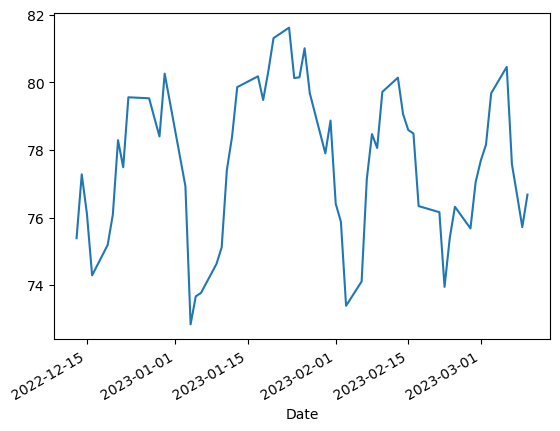

In [10]:
data['Close'].plot()

<span style="color:#000080; font-weight: bold;font-size: 14px;">On remarque que notre signal a une tendance non linéaire.En plus il présente des pics et des creux donc des variations rapides des prix au cours du temps=> dérivé importante.On déduit ainsi que les composantes de hautes fréquences de ce signal sont non nulles.
 
 



**-Analyse de Fourier**

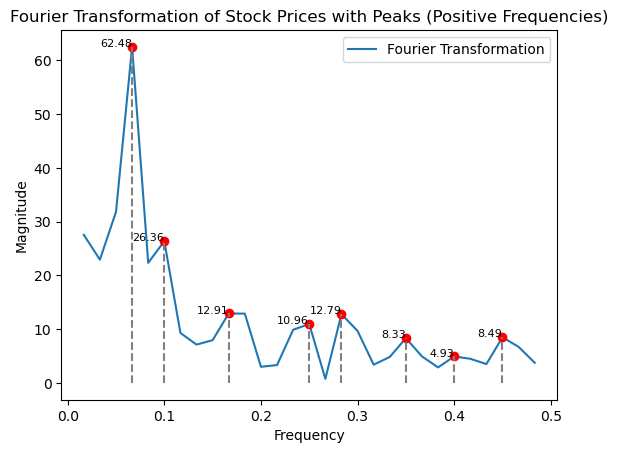

In [12]:

from scipy.signal import find_peaks
closing_prices = data['Close']
fourier_transform = np.fft.fft(closing_prices)
frequencies = np.fft.fftfreq(len(closing_prices))
peaks, _ = find_peaks(np.abs(fourier_transform))
positive_frequencies = frequencies > 0
plt.plot(frequencies[positive_frequencies], np.abs(fourier_transform[positive_frequencies]), label='Fourier Transformation')
for peak in peaks:
    if positive_frequencies[peak]:
        plt.plot(frequencies[peak], np.abs(fourier_transform[peak]), 'ro')  # Marquer le pic avec un cercle rouge
        plt.vlines(x=frequencies[peak], ymin=0, ymax=np.abs(fourier_transform[peak]), linestyle='--', color='gray')
        plt.text(frequencies[peak], np.abs(fourier_transform[peak]), f'{np.abs(fourier_transform[peak]):.2f}', fontsize=8, ha='right')
plt.title('Fourier Transformation of Stock Prices with Peaks (Positive Frequencies)')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()

<span style="color:#000080; font-weight: bold;font-size: 14px;"> * En analysantle spectre de fréquence on peut identifier les tendances à différentes échelles de temps. On remarque qu'il ya une seule composante dominante (correspond à un amplitudede 60.48)à basse fréquence, ce qui peut suggèrer la présence d'une tendance à long terme. Les autres composantes  représentent les  fluctuations à court terme.
    
<span style="color:#000080; font-weight: bold;font-size: 14px;">* Pour déterminer s'il existe une périodicité dans le siganl en va éliminer le fluctuations qui correspondes au petits pics dans le spectre de fréquence




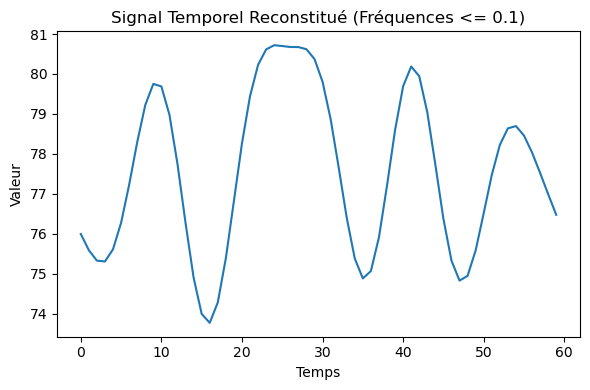

In [13]:
closing_prices = data['Close']

fourier_transform = np.fft.fft(closing_prices)
frequencies = np.fft.fftfreq(len(closing_prices))
high_freq_indices = np.abs(frequencies) > 0.1
fourier_transform[high_freq_indices] = 0
reconstructed_signal = np.fft.ifft(fourier_transform)
plt.figure(figsize=(6, 4))

plt.plot(np.real(reconstructed_signal))
plt.title('Signal Temporel Reconstitué (Fréquences <= 0.1)')
plt.xlabel('Temps')
plt.ylabel('Valeur')

plt.tight_layout()
plt.show()

<span style="color:#000080; font-weight: bold;font-size: 14px;">Le signal temporel reconstité montre la présence d'une certaine périodicité avec une période de dizaine de jours.

**-ACF plot et PACF plot**

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

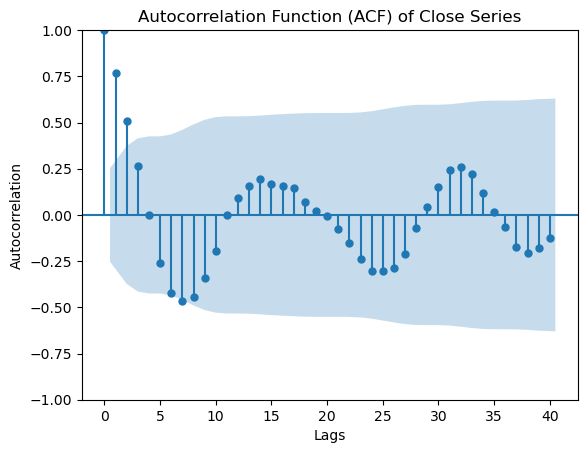

In [15]:
# graphique de l'ACF
close_series=data['Close']
plot_acf(close_series, lags=40)  # Vous pouvez ajuster le nombre de retards (lags) selon vos besoins
plt.title('Autocorrelation Function (ACF) of Close Series')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

<span style="color:#000080; font-weight: bold;font-size: 14px;">On remarque le diagramme ACF a une forme sinusoidal. cette forme sinusiadal est expliqué par la présence d'une composante saisonnière .On remarque aussi qu'on a aucun pic significatif après le 7ème décalage ce qui indique que la série étudié est stationnaire.Pour vérifier l'hypothèse de stationnarité, on va utilisé les tests ADF et KPSS

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


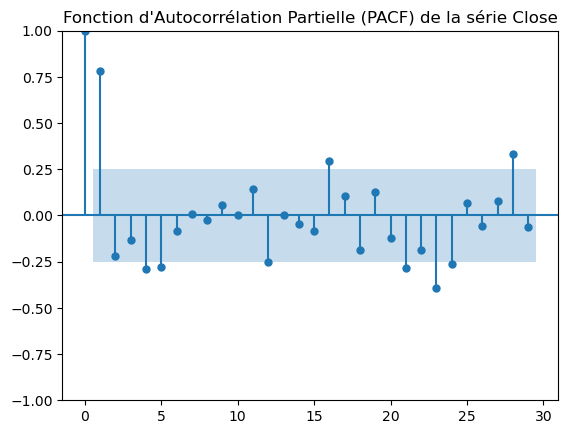

In [16]:
# Tracez la PACF de la série 'Close'
plot_pacf(data['Close'],lags=29)
plt.title('Fonction d\'Autocorrélation Partielle (PACF) de la série Close')
plt.show()

<span style="color:#000080; font-weight: bold;font-size: 14px;"> On remarque que le diagramme PACF présente des composantes significatives de manière plus au mois périodique. le résultat de la présence de la composante saisonnaire est cohérente avec l'analyse de fourier précedent

**-Tests de stationnarité sur la série 'Close'**

In [17]:
from statsmodels.tsa.stattools import adfuller, kpss 
close_prices = data['Close']

In [18]:
#Test ADF
result_adf = adfuller(close_prices)
print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", result_adf[0])
print("P-Value:", result_adf[1])#mesure statistique qui indique la probabilité que l'hypothèse nulle du test soit vraie.
print("Number of lags:", result_adf[2]) #Le nombre optimal de lags utilisés dans le test. Ce nombre est généralement choisi automatiquement pour optimiser la performance du test.
print("Number of observations:", result_adf[3])#Le nombre d'observations utilisées dans le test.
print("Critical Values:", result_adf[4])

ADF Test Results
Null Hypothesis: The series has a unit root (non-stationary)
ADF-Statistic: -4.507173188554421
P-Value: 0.0001908538510862125
Number of lags: 4
Number of observations: 55
Critical Values: {'1%': -3.5552728880540942, '5%': -2.9157312396694217, '10%': -2.5956695041322315}


<span style="color:#000080; font-weight: bold;font-size: 14px;"> on remarque la valeur statistique du test $p=0.00019<0.05$ donc on rejette  $H0$ et on accepte $H1$ . Donc la série est stationnaire 

In [19]:
# Test KPSS
result_kpss = kpss(close_prices)
print("KPSS Statistic:", result_kpss[0])
print("p-value:", result_kpss[1])
print("Lags Used:", result_kpss[2])
print("Critical Values:", result_kpss[3])


KPSS Statistic: 0.07901674006420926
p-value: 0.1
Lags Used: 4
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


<span style="color:#000080; font-weight: bold;font-size: 14px;"> On remarque que la valeur $p=0.1 >0.05$ donc on accepte $H0$.La série est stationnaire autour d'une tendance déterministe.

<span style="color:#000080; font-weight: bold;font-size: 14px;"> => Conclusion: D'après les résultats des 2 tests on tombe dans le cas du $ScénarioI$:la série est stationnaire

***2ème ètape:Choix du modèle et de son ordre** 

D'apres les diagrammes ACF et PACF on conclut qu'un modèle MA va etre plus appropriè qu'un modèle AR vu la présence de la composante saisonnière.

Puisque ona un aucun pic après le lag 7 alors le modèle MA va etre d'ordre 7

***3ème étape: prédiction MA**

In [20]:
from statsmodels.tsa.arima.model import ARIMA


In [21]:
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA

# Téléchargez les données
data = yf.download(tickers="CL=F", start="2022-12-13", end="2023-03-13", progress=False)

# Sélectionnez la colonne de clôture
closing_prices = data['Close']

# Créez un modèle MA(7)
ma_order = 7
ma_model = ARIMA(closing_prices, order=(0, 0, ma_order))
ma_result = ma_model.fit()

# Faites des prédictions sur l'ensemble d'entraînement et de test
predictions_train = ma_result.predict(start=1, end=len(closing_prices), dynamic=False)
predictions_test = ma_result.predict(start=len(closing_prices), end=len(closing_prices) + len(test) - 1, dynamic=False)

# Spécifiez la taille du plot
plt.figure(figsize=(12, 6))

# Tracer les observations
plt.plot(closing_prices.index, closing_prices, label='Observations Réelles', color='blue')

# Tracer les prédictions d'entraînement
plt.plot(closing_prices.index[:-len(test)], predictions_train[:-len(test)], label='Prédictions MA(7) (Entraînement)', color='green')

# Tracer les prédictions de test
plt.plot(closing_prices.index[-len(test):], predictions_test, label='Prédictions MA(7) (Test)', color='red', linestyle='--')

# Ajoutez un titre et des labels d'axe
plt.title('Modélisation MA(7) pour les Prix de Clôture')
plt.xlabel('Date')
plt.ylabel('Valeur de Clôture')

# Ajoutez une légende
plt.legend()

# Affichez le plot
plt.show()



C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


NameError: name 'test' is not defined

<span style="color:#000080; font-weight: bold;font-size: 14px;">Bienque les modèles MA sont généralement utilisés pour modéliser la composante irrégulière ou le bruit dans une série temporelle, et ils ne capturent pas explicitement la composante saisonnière, on remarque un certain cohèrence entre les valeurs réelles et les valeurs prédites sur une prédiode de 5 jours

**Prédiction AR avec Lags choisis**

<span style="color:#000080; font-weight: bold;font-size: 14px;">Si les diagrammes ACF  et PACF suggèrent que le modèle autorégressif (AR) ne convient pas de manière optimale à la prédiction du signal financier, nous envisageons une approche alternative. Nous allons tenter de modéliser les données en utilisant un nombre limité de retards, spécifiquement ceux qui présentent des pics significatifs en dehors de la zone bleue dans le diagramme PACF

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results wil

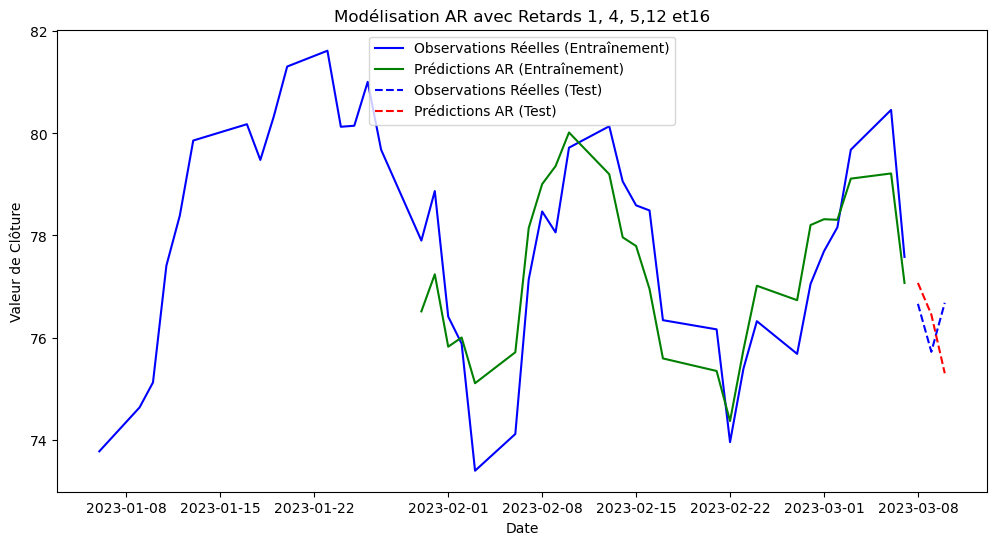

In [22]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.api import AutoReg
from statsmodels.graphics.tsaplots import plot_acf

# Téléchargez les données sur les prix du pétrole brut
data = yf.download(tickers="CL=F", start="2022-12-13", end="2023-03-13", progress=False)

# Assurez-vous que la colonne 'Close' est interprétée comme une série temporelle
closing_prices = data['Close']


# Créez un DataFrame avec les valeurs de clôture et les lags spécifiques
df = pd.DataFrame({
    'Close': closing_prices,
    'Lag1': closing_prices.shift(1),
    'Lag4': closing_prices.shift(4),
    'Lag5': closing_prices.shift(5),
    'Lag12': closing_prices.shift(12),
    'Lag16': closing_prices.shift(16)
})
df = df.dropna()

# Séparez les données pour l'entraînement et les tests
train_size = int(len(df) * 0.95)
train, test = df[0:train_size], df[train_size:]

# Séparez les prédicteurs (X) et la variable cible (y)
X_train, y_train = train[['Lag1', 'Lag4', 'Lag5', 'Lag12', 'Lag16']], train['Close']
X_test, y_test = test[['Lag1', 'Lag4', 'Lag5', 'Lag12', 'Lag16']], test['Close']

# Ajustez le modèle AR avec les lags spécifiques
ar_model = AutoReg(y_train, lags=[1, 4, 5, 12, 16])
ar_result = ar_model.fit()

ar_result = ar_model.fit()

predictions_train = ar_result.predict(start=1, end=len(train), dynamic=False)
predictions_test = ar_result.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

plt.figure(figsize=(12, 6)) 
plt.plot(train.index, train['Close'], label='Observations Réelles (Entraînement)', color='blue')
plt.plot(train.index, predictions_train, label='Prédictions AR (Entraînement)', color='green')
plt.plot(test.index, test['Close'], label='Observations Réelles (Test)', color='blue', linestyle='--')
plt.plot(test.index, predictions_test, label='Prédictions AR (Test)', color='red', linestyle='--')

plt.title('Modélisation AR avec Retards 1, 4, 5,12 et16')
plt.xlabel('Date')
plt.ylabel('Valeur de Clôture')
plt.legend()
plt.show()

<span style="color:#000080; font-weight: bold;font-size: 14px;">On remarque que les valeurs prédites sont cohérentes avec les valeurs réelles pour les quatre premiers jours, puis on observe une augmentation de l'écart entre les deux, atteignant 0.9$ au bout du dernier jour .

## <font color='#922B21'>III) Modèle ARMA 
    
## <font color='#d98880'>1) Modèle ARMA
    
L'autorégressif à moyenne mobile (ARMA) combine l'autorégression d'ordre p avec la moyenne mobile d'ordre q. Ainsi,**l'approche décrit la relation d'une série temporelle avec elle-même et le bruit aléatoire des pas de temps précédents** :
<div style="text-align: center;font-size: 18px;">

$$ Y_t = \sum_{i=1}^{p} \phi_i Y_{t-i} + \varepsilon_t - \sum_{j=1}^{q} \theta_j \varepsilon_{t-j} $$

</div>

Ici, le premier terme de la sommation représente la partie autorégressive et le deuxième terme de la sommation représente la moyenne mobile.

Choisir les bons ordres pour les composantes p et q de notre modèle ARMA peut être assez difficile, car les graphiques de la fonction d'autocorrélation (ACF) et de la fonction d'autocorrélation partielle (PACF) pourraient ne pas nous aider beaucoup si les deux composantes sont présentes. Cependant, ils pourraient indiquer l'ordre et nous aider à trouver un bon point de départ pour l'ajustement de nos hyperparamètres. Nous pouvons également utiliser **une recherche sur grille dans laquelle nous testons différentes combinaisons de p et q**, puis choisissons les ordres en fonction d'un critère choisi, tel que l'AIC (criterion d'information d'Akaike).

Tout comme l'autorégression et la moyenne mobile, la méthode ARMA fonctionne bien uniquement pour les **séries temporelles stationnaires.**

## <font color='#d98880'>2) Modèle ARIMA
Les modèles AutoRegressive Integrated Moving Average (ARIMA) sont largement utilisés pour les séries temporelles non stationnaires. Au lieu de réaliser la différenciation dans une étape distincte, nous pouvons l'inclure directement dans le modèle ARMA en ajoutant un ordre de différenciation d, ce qui nous conduit à un modèle AutoRegressive Integrated Moving Average (ARIMA). Un ordre d de 1 signifie que la série temporelle est différenciée une fois, tandis qu'un ordre d de 2 signifie que nous différencions la série temporelle deux fois.

## <font color='#d98880'>2) Case Study

Nous allons analyser une série temporelle représentant les prix des actions de Netflix. Notre objectif est de modèliser ce signal  à l'aide du modèle ARMA approprié

**- Visualisation des données**

[*********************100%%**********************]  1 of 1 completed
Date
2018-04-02    280.290009
2018-04-03    283.670013
2018-04-04    288.940002
2018-04-05    293.970001
2018-04-06    288.850006
Freq: D, Name: Close, dtype: float64


<AxesSubplot:xlabel='Date'>

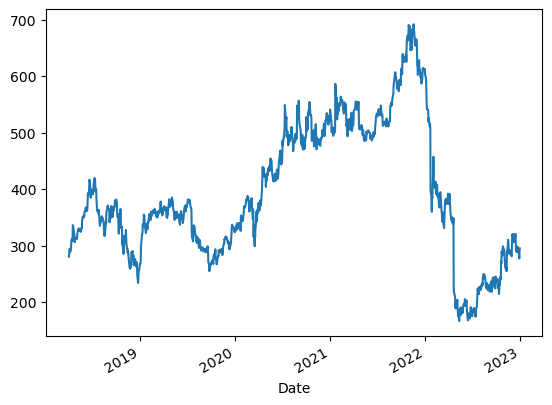

In [23]:
# Extraction des données historiques de clôture pour NFLX depuis Yahoo Finance
dataset = yf.download('NFLX', start='2018-04-1', end='2023-1-1')

# Afficher les données
y = dataset["Close"].resample("1D").mean().fillna(method="ffill")
print(y.head())
dataset['Close'].plot()

<span style="color:#000080; font-weight: bold;font-size: 14px;">Il est nettement clair  que la série n'est pas stationnaire. Elle présente une tendance non linéaire. Pour ce la nous allons procéder à la différentiation afin d'élimininer la composante de tendance puisque le modèle ARMA donne de meilleur performance pour les séries stationnaires 

**- Différenciation**

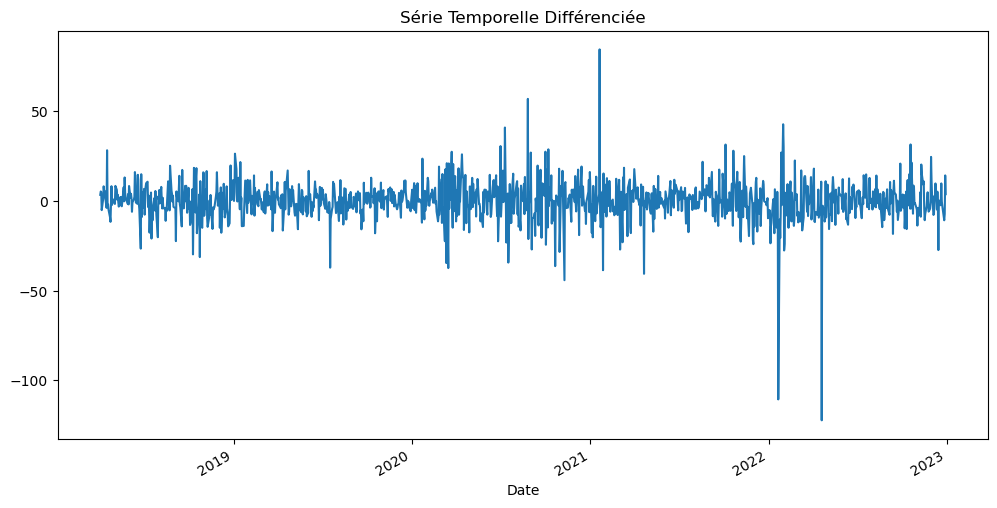

In [24]:
# Créez une nouvelle colonne pour la série différenciée
dataset['Close_diff'] = dataset['Close'].diff()
close_diff = dataset['Close_diff'].dropna()

# Tracez la série différenciée
plt.figure(figsize=(12, 6))
close_diff.plot(title='Série Temporelle Différenciée')
plt.show()

**- Vérification de la stationnarité de la série différentiée**

In [25]:
#Test ADF
result_adf = adfuller(close_diff )
print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", result_adf[0])
print("P-Value:", result_adf[1])#mesure statistique qui indique la probabilité que l'hypothèse nulle du test soit vraie.
print("Number of lags:", result_adf[2]) #Le nombre optimal de lags utilisés dans le test. Ce nombre est généralement choisi automatiquement pour optimiser la performance du test.
print("Number of observations:", result_adf[3])#Le nombre d'observations utilisées dans le test.
print("Critical Values:", result_adf[4])

ADF Test Results
Null Hypothesis: The series has a unit root (non-stationary)
ADF-Statistic: -35.974799580084564
P-Value: 0.0
Number of lags: 0
Number of observations: 1196
Critical Values: {'1%': -3.435829423619109, '5%': -2.863959622178626, '10%': -2.5680582513898056}


In [26]:
# Test KPSS
result_kpss = kpss(close_diff)
print("KPSS Statistic:", result_kpss[0])
print("p-value:", result_kpss[1])
print("Lags Used:", result_kpss[2])
print("Critical Values:", result_kpss[3])

KPSS Statistic: 0.16997376984584642
p-value: 0.1
Lags Used: 4
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


<span style="color:#000080; font-weight: bold;font-size: 14px;"> D'après les deux tests on remarque bien que notre série différencié est stationnaire

*** Inversion de la différenciation et Division des données en ensembles d'entraînement et de test**

Après avoir effectué la prédiction avec le modèle ARMA,On inverse la différenciation pour obtenir les prédictions sur l'échelle d'origine.

In [27]:
# Inversion de la différenciation
y_inverted = close_diff.cumsum()
# Diviser les données en ensembles d'entraînement et de test
y_train = y_inverted.loc["2018-04-1":"2022-12-12"]
y_test = y_inverted.loc["2022-12-13":]

***Erreur absolue moyenne de référence pour notre modèle**

Nous allons effectuer une évaluation simple d'une métrique d'erreur, en l'occurrence l'erreur absolue moyenne (MAE), pour un modèle de référence appelé "baseline". Ce modèle baseline est très simple et consiste à prédire constamment la moyenne des prix de cloture

In [28]:
import time
import seaborn as sns
from sklearn.metrics import mean_absolute_error

In [29]:
#calcul de la moyenne
y_train_mean= y_train.mean()
#prédiction constante du modèle baseline pour chaque observation dans l'ensemble d'entraînement
y_pred_baseline = [y_train_mean] * len(y_train)
#Calcul l'erreur absolue moyenne (MAE) entre les vraies valeurs de l'ensemble d'entraînement (y_train) et les prédictions du modèle baseline (y_pred_baseline)
mae_baseline= mean_absolute_error(y_train, y_pred_baseline)

print("moyenne des prix de cloture pour la série différencié  :", round(y_train_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

moyenne des prix de cloture pour la série différencié  : 114.53
Baseline MAE: 100.3


***Choix des paramètres p et q**

Pour ce faire on va faire "**l'ajustement des hyperparamètres**". Donc, pour les valeurs possibles de p, nous allons créer une plage de 0 à 29 par incréments de 4. Ensuite, nous avons les paramètres pour q, et ici nous allons utiliser une plage plus petite de 0 à 3 par incréments de 1.

Et si vous vous demandez pourquoi nous avons plus de paramètres p que de paramètres q, la raison est que c'est un peu ainsi que fonctionnent les modèles ARMA lorsque nous pensons à l'AR, ou que nous regardons dans le passé, et nous regardons souvent dans le passé pour prédire le présent ou le futur. C'est pourquoi nous avons beaucoup de paramètres p. Mais pour q, ce sont plutôt des chocs à court terme au système. Et donc, vous n'avez souvent pas de grands nombres pour q. Nous le maintenons petit, un, deux, trois, quelque chose comme ça.


In [30]:
p_params = range(0,20,8)
q_params = range(0,4,1)

In [31]:
# Create dictionary to store MAEs
mae_grid = dict()
# Outer loop: Iterate through possible values for `p`
for p in p_params:
      # Create key-value pair in dict. Key is `p`, value is empty list.
      mae_grid[p] = list()
      # Inner loop: Iterate through possible values for `q`
      for q in q_params:
           # Combination of hyperparameters for model
           order = (p, 0, q)
           # Note start time
           start_time = time.time()
           # Train model
           model = ARIMA(y_train, order=order).fit()
           # Calculate model training time
           elapsed_time = round(time.time() - start_time, 2)
           print(f"Trained ARIMA {order} in {elapsed_time} seconds.")
           # Generate in-sample (training) predictions
           y_pred = model.predict()
           # Calculate training MAE
           mae = mean_absolute_error(y_train, y_pred)
           # Append MAE to list in dictionary
           mae_grid[p].append(mae)

     
print()
print(mae_grid)


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (0, 0, 0) in 0.2 seconds.


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (0, 0, 1) in 0.23 seconds.


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (0, 0, 2) in 1.1 seconds.


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Trained ARIMA (0, 0, 3) in 0.92 seconds.


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (8, 0, 0) in 0.75 seconds.


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (8, 0, 1) in 1.5 seconds.


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (8, 0, 2) in 2.14 seconds.


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Len

Trained ARIMA (8, 0, 3) in 4.24 seconds.
Trained ARIMA (16, 0, 0) in 2.46 seconds.


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (16, 0, 1) in 5.13 seconds.


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (16, 0, 2) in 2.55 seconds.


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (16, 0, 3) in 5.67 seconds.

{0: [100.30413102282293, 52.74770350530679, 32.74339816234757, 24.02006118714889], 8: [7.588609751479552, 7.589829286879254, 7.586051651976439, 7.587915945154803], 16: [7.579623321132025, 7.581965126656053, 7.580939673777896, 7.568468295148816]}


Maintenat on va prendre le dictionnaire et le mettre dans une dataFrame

Nous explorons ces différentes combinaisons d'hyperparamètres et définir ce qui nous donne les meilleures performances pour notre modèle en utilisant une grille.

Donc, ce que nous devons faire pour chaque combinaison de p et q, c'est d'abord, nous devons entraîner un modèle avec ces hyperparamètres. Ensuite, nous devrons calculer l'erreur absolue moyenne d'entraînement pour ce modèle particulier. Ensuite, nous devrons sauvegarder ce résultat. Nous ferons cela pour chaque combinaison unique dans cette grille. Et une fois que nous l'aurons fait, nous examinerons toutes les valeurs différentes de l'erreur absolue moyenne (MAE), et nous choisirons celle qui a la meilleure performance.

In [32]:
mae_df = pd.DataFrame(mae_grid)
mae_df.round(4)

,0,8,16
0,100.3041,7.5886,7.5796
1,52.7477,7.5898,7.5820
2,32.7434,7.5861,7.5809
3,24.0201,7.5879,7.5685


Donc, nous avons toutes les valeurs possibles pour p, puis vers le bas de l'index, nous avons toutes les valeurs possibles pour q. Ensuite, au milieu, nous avons les différentes erreurs absolues moyennes pour les modèles entraînés avec ces ensembles d'hyperparamètres.

Transformons ce cadre de données en une carte thermique pour une meilleur visualisation



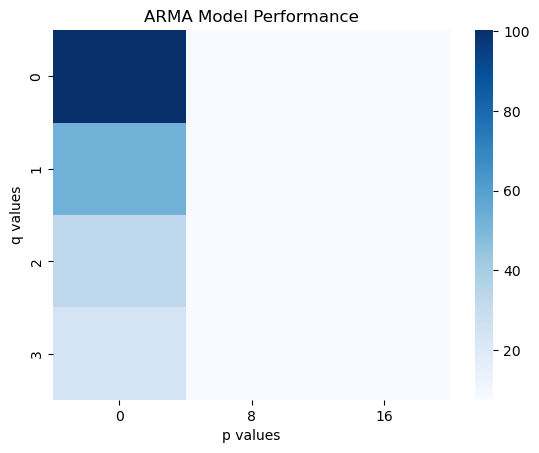

In [33]:
sns.heatmap(mae_df, cmap = "Blues")
plt.xlabel("p values")
plt.ylabel("q values")
plt.title("ARMA Model Performance");

<span style="color:#000080; font-weight: bold;font-size: 14px;">On remarque que tous les modèles où p=0 sont médiocres.la deuxième conclusion importante est que une fois que la valeur de p a augmenté, la performance du modèle n'a pas changé.
Le meilleur modèle est celui où p était de 8 et q était de 0. Si nous revenons en arrière et regardons le DataFrame de l'erreur absolue moyenne (MAE), nous pouvons voir que notre meilleur modèle avec une erreur absolue moyenne de 5.4638, puis notre deuxième meilleur modèle avec 5.4642, présente une différence presque négligeable. 



***Résultat et évaluation**

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


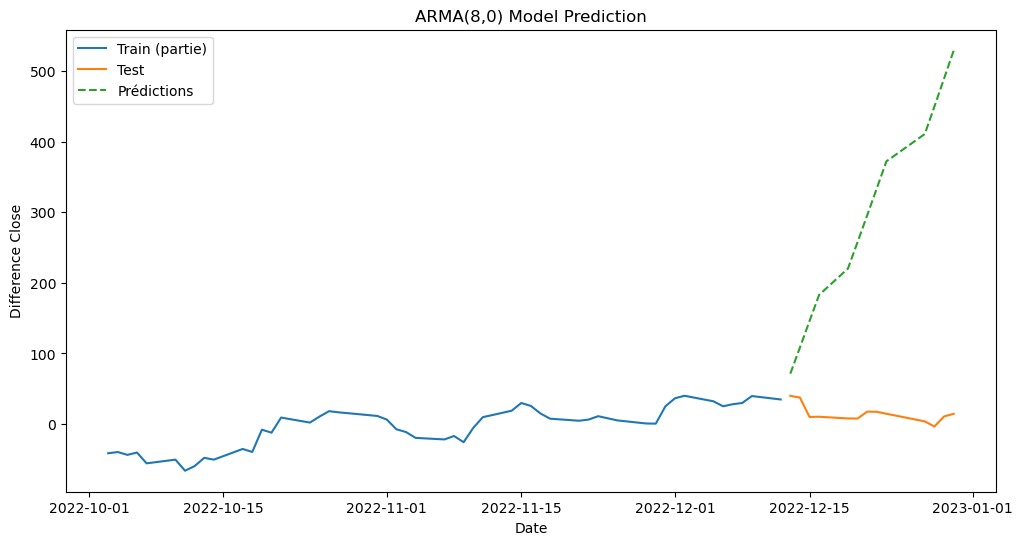

In [34]:

order = (8, 0, 0)  # (p, d, q)
arma_model = ARIMA(y_train, order=order)

# 2. Adaptez le modèle aux données d'entraînement
arma_result = arma_model.fit()

# Faire des prédictions sur les données de test
predictions_diff = arma_result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False)

# Inversion de la différenciation pour les prédictions
predictions = y_train.iloc[-1] + predictions_diff.cumsum()

# Tracer les résultats
plt.figure(figsize=(12, 6))
# Tracer une partie des valeurs d'entraînement
plt.plot(y_train.index[-50:], y_train.iloc[-50:], label='Train (partie)')
# Tracer les données de test
plt.plot(y_test.index, y_test, label='Test')
# Tracer les prédictions
plt.plot(y_test.index, predictions, label='Prédictions', linestyle='--')

# Ajouter des titres et des étiquettes d'axe
plt.title('ARMA(8,0) Model Prediction')
plt.xlabel('Date')
plt.ylabel('Difference Close')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()



In [205]:
df_predictions = pd.DataFrame({"y_test": y_test,"y_pred": predictions})
df_predictions.head()

,y_test,y_pred
2022-12-13 00:00:00,40.049988,NaN
2022-12-14 00:00:00,37.539978,NaN
2022-12-15 00:00:00,10.119995,NaN
2022-12-16 00:00:00,10.419983,NaN
2022-12-19 00:00:00,8.009979,NaN


In [206]:
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, predictions)

print(f'MAE: {mae}')


MAE: 282.8433793403356


### <span style="color: #3498db; font-weight: bold;">*Modèle ARIMA pour la prédiction

[*********************100%%**********************]  1 of 1 completed


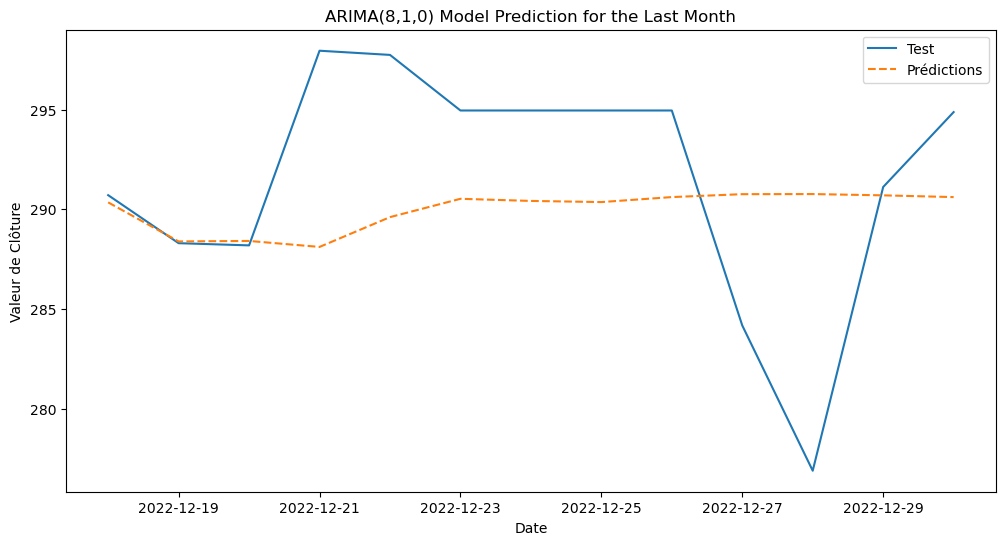

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA

# Télécharger les données
dataset = yf.download('NFLX', start='2018-04-1', end='2023-1-1')

# Extraire la série temporelle quotidienne
y = dataset["Close"].resample("1D").mean().fillna(method="ffill")

# Diviser les données en ensemble d'entraînement et ensemble de test
train_size = int(len(y) * 0.993)
y_train, y_test = y[:train_size], y[train_size:]

# Créer le modèle ARIMA(8,1,0)
order = (8, 1, 0)  # (p, d, q)
arima_model = ARIMA(y_train, order=order)

# Adapter le modèle aux données d'entraînement
arima_result = arima_model.fit()

# Prédire sur le dernier mois
forecast_steps = len(y_test)
forecast = arima_result.get_forecast(steps=forecast_steps)

# Extraire les prédictions et les intervalles de confiance
predictions = forecast.predicted_mean
confidence_interval = forecast.conf_int()

# Tracer les résultats
plt.figure(figsize=(12, 6))

# Tracer les données de test
plt.plot(y_test.index, y_test, label='Test')

# Tracer les prédictions
plt.plot(predictions.index, predictions, label='Prédictions', linestyle='--')

# Ajouter des titres et des étiquettes d'axe
plt.title('ARIMA(8,1,0) Model Prediction for the Last Month')
plt.xlabel('Date')
plt.ylabel('Valeur de Clôture')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()



In [172]:
df_predictions = pd.DataFrame({"y_test": y_test,"y_pred": predictions})
df_predictions

,y_test,y_pred
2022-12-18,290.709991,290.622364
2022-12-19,288.299988,289.018583
2022-12-20,288.190002,289.096999
2022-12-21,297.959991,289.217921
2022-12-22,297.750000,290.857746
2022-12-23,294.959991,290.971492
2022-12-24,294.959991,291.217825
2022-12-25,294.959991,291.516363
2022-12-26,294.959991,292.021081
2022-12-27,284.170013,292.312681


In [173]:
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, predictions)

print(f'MAE: {mae}')

MAE: 4.522028930708149


# webographies


https://medium.com/towards-data-science/a-brief-introduction-to-time-series-forecasting-using-statistical-methods-d4ec849658c3

https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf/notebook#%F0%9F%9A%80-Cheat-Sheet

https://ilyasbinsalih.medium.com/what-are-acf-and-pacf-plots-in-time-series-analysis-cb586b119c5d

https://medium.com/@sawsanyusuf/forecasting-time-series-data-with-arma-model-949fb9ef8460